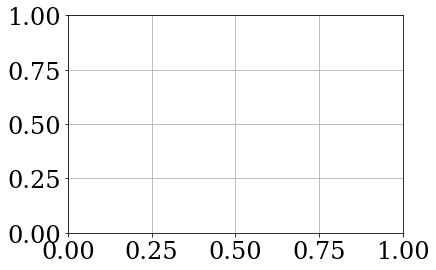

<Figure size 864x720 with 0 Axes>

In [2]:
%load_ext autoreload
%autoreload 2
import config
import DataLoader as dl

import pandas as pd
import numpy as np
import random
import pickle

# plotting
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.cm as cm
import effects_experiments as ee


%matplotlib inline

plt.rc('font', size=24, family='serif')
plt.grid(zorder=-100)
plt.figure(figsize=(12, 10))

#plt.switch_backend('agg')
plt.rcParams.update({'figure.max_open_warning': 0})

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

np.random.seed(0)

In [127]:
dfDX = pd.read_csv('data/asym_noise_residuals_estimators_gen_df_DX_Based_N_10000_rnd_seed_0_epsilon_0.1_gamma0_2.0_gamma1_2.0.csv')
dfSantiago = pd.read_csv('data/asym_noise_residuals_estimators_gen_df_Santiago_Based_N_10000_rnd_seed_0_epsilon_0.1_gamma0_2.0_gamma1_2.0.csv')

In [128]:
gen_df_DX_Based, gen_df_Santiago_Based, gen_df_DX_Based_train, gen_df_DX_Based_test, gen_df_Santiago_Based_train, gen_df_Santiago_Based_test, RIDs_train, RIDs_test = ee.pre_processing(dfDX, dfSantiago, train_size=0.8)

In [130]:
gen_df_DX_Based_test.head(50)

,ABETARatio,ADAS13,AGE,APOE4,AV45,CDRSB,DX,Delta,FDG,MMSE,...,Y_hat,Z,A_Cat,A_1,A_2,A_3,A_4,A_5,A_6,A_7
1,0.206301,10.656934,0.187127,0,-1.288344,-1.317175,1,0.0,-0.213384,0.640339,...,10.656934,1,0,0,0,0,0,0,0,0
3,0.080665,31.380875,-0.891675,0,0.914371,-1.111656,2,0.0,-0.449933,0.452995,...,31.380875,0,0,0,0,0,0,0,0,0
4,0.079652,27.744216,0.354085,1,0.783897,-1.112263,1,0.0,1.676019,1.288075,...,27.744216,0,0,0,0,0,0,0,0,0
6,0.179481,27.443859,-0.647660,0,-2.278369,-0.934933,1,0.0,1.093747,0.735547,...,27.443859,1,0,0,0,0,0,0,0,0
11,0.218894,10.343272,-1.289805,1,-1.872538,-1.719023,1,0.0,0.674741,1.254189,...,10.343272,1,0,0,0,0,0,0,0,0
16,0.092015,25.256298,-0.095416,1,0.269858,-1.517175,1,0.0,0.044434,1.069026,...,25.256298,0,0,0,0,0,0,0,0,0
18,0.203720,23.814784,-1.508134,2,-1.470212,-1.545190,1,0.0,1.316056,0.560697,...,23.814784,1,0,0,0,0,0,0,0,0
24,0.212324,17.231835,-2.278707,0,-2.892173,-1.320718,1,0.0,0.305460,0.842856,...,17.231835,1,0,0,0,0,0,0,0,0
26,0.191844,19.944764,-2.548408,0,-0.751001,-1.404931,1,0.0,0.847990,0.820481,...,19.944764,1,0,0,0,0,0,0,0,0
30,0.148211,16.892779,-2.111750,0,-1.303173,-1.143919,2,0.0,-0.100819,0.372344,...,16.892779,0,0,0,0,0,0,0,0,0


## Treatment Trajectories

### Santiago Hernandez Policy

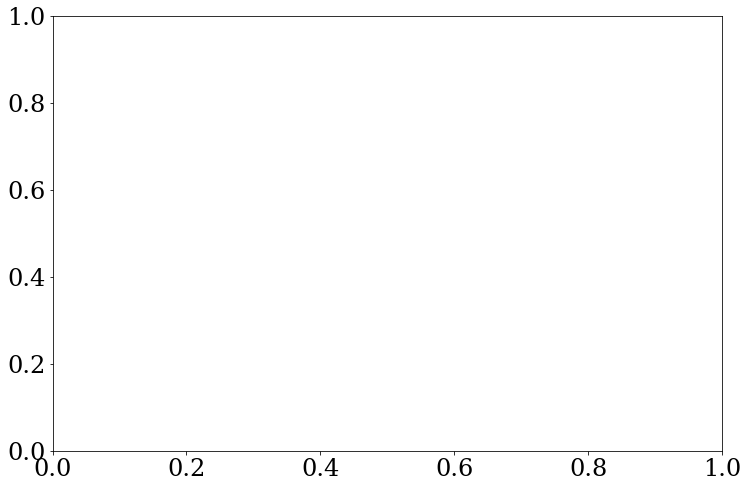

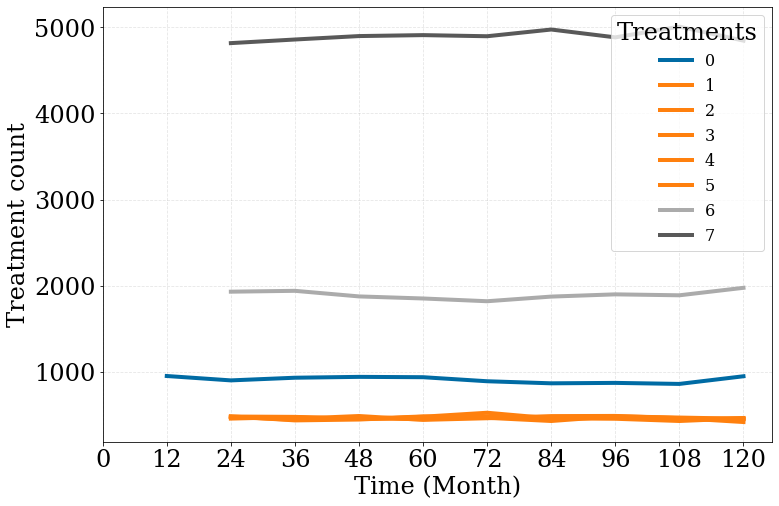

In [131]:
fig, ax = plt.subplots()
plt.style.use('tableau-colorblind10')
plt.rc('font', size=24, family='serif')
plt.figure(figsize=(12, 8))

d = dfSantiago.groupby(['VISCODE','A'], as_index=False).count()

classes = [0, 1, 1, 1, 1, 1, 2, 3]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
t_start = 1
for a in range(8):
    da = d[d['A']==a].iloc[t_start:]
    plt.plot(da['VISCODE'], da['Y_hat'], label=a, lw=4, c=colors[classes[a]])

plt.ylabel('Treatment count')
plt.xlabel('Time (Month)')
plt.legend(title="Treatments", loc="upper right", fontsize=16)
plt.grid(zorder=-100, color='gray', linestyle='dashed', alpha=0.2)
plt.xticks(list(range(0, 132, 12)))

plt.savefig('plots/observed_outcome_Santiago.pdf', format='pdf', dpi=500)
plt.show()


### DX Policy

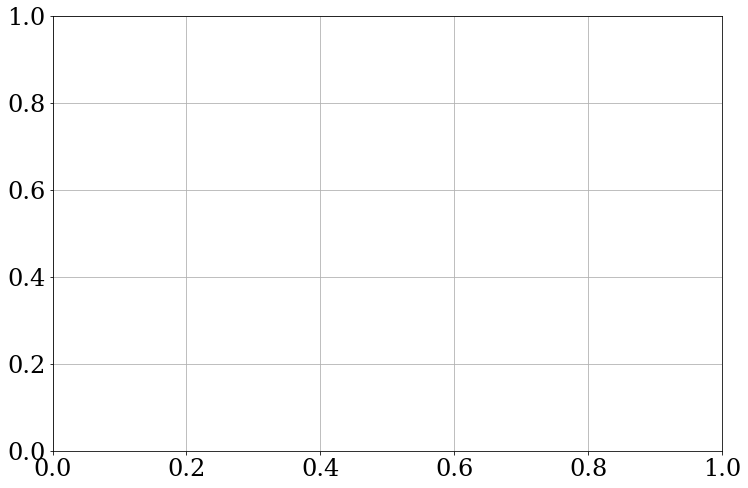

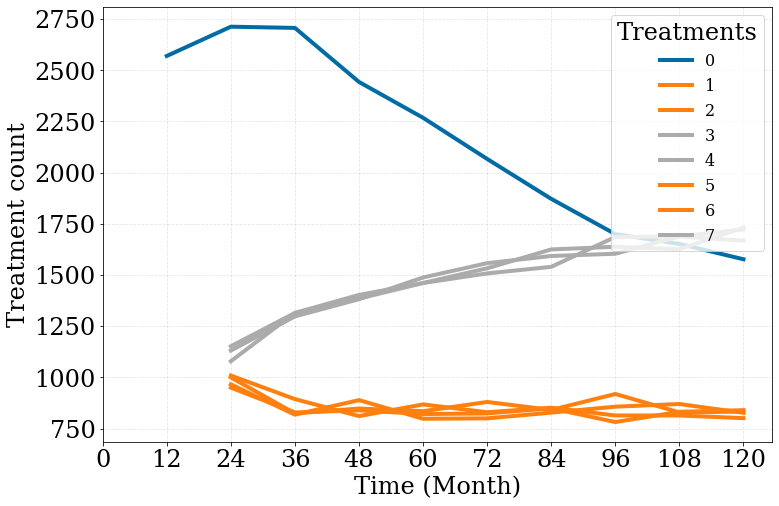

In [132]:
plt.style.use('tableau-colorblind10')
plt.rc('font', size=24, family='serif')
plt.grid(zorder=-100)
plt.figure(figsize=(12, 8))

d = dfDX.groupby(['VISCODE','A'], as_index=False).count()
classes = [0, 1, 1, 2, 2, 1, 1, 2]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
t_start = 1
for a in range(8):
    da = d[d['A']==a].iloc[t_start:]
    plt.plot(da['VISCODE'], da['Y_hat'], label=a, lw=4, c=colors[classes[a]])

plt.ylabel('Treatment count')
plt.xlabel('Time (Month)')
plt.legend(title="Treatments", loc="upper right", fontsize=16)
plt.grid(zorder=-100, color='gray', linestyle='dashed', alpha=0.2)
plt.xticks(list(range(0, 132, 12)))

plt.savefig('plots/observed_outcome_DX.pdf', format='pdf', dpi=500)
plt.show()

In [13]:
def return_df(titles, lists, y_label, xlabel, xlabels, est, ylim=[0, 20], opacity= [0.1, 0.1, 1]):    
    errors = {}
    action_stds ={}
    
    for idx, alist in enumerate(lists):
        ll = [list(li) for li in alist] # x-coordinates of your bars
        y=[[i[0] for i in li] for li in ll]
        errors[xlabels[idx]]= y #[np.mean(yi) for yi in y]
        yerr_=[[i[1] for i in li] for li in ll]
        action_stds[xlabels[idx]]=yerr_
    
    errorx = errors[0.1] 
    action_stdx = action_stds[0.1]    
    return errorx, action_stdx


def plot_one_bar(titles, lists, y_label, xlabel, xlabels, est, ylim=[0, 20], opacity= [0.1, 0.1, 1]):
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    np.random.seed(0)
    plt.rcParams["figure.figsize"] =(12, 8)
    plt.rc('font', size=24, family='serif')
    plt.style.use('tableau-colorblind10')
    #import matplotlib.patches as mpatches

    w = 0.35    # bar width
    
    fig, ax = plt.subplots()
    ax.set_ylim(ylim)
    patterns = [ "/",  "\\", "+", ".", "+" , "\\",  "x", "o", "O", ".", "|" , "+" , "*" ]
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors =[colors[0], colors[2], colors[1]] + colors[3:]
    plt.ylabel(y_label)
    
    
    for idx, alist in enumerate(lists):
        ll = [list(li) for li in alist] # x-coordinates of your bars
        y=[[i[0] for i in li] for li in ll]
        yerr_=[[i[1] for i in li] for li in ll]
        x = np.linspace(2*idx, 2*idx+1, num=len(y))
        #print(len(x))
        bars = ax.bar(x,
               height=[np.mean(yi) for yi in y],
               #yerr=[np.std(yi) for yi in y],    # error bars
               capsize=10, # error bar cap width in points
               width=w,    # bar width
               #tick_label=[ti for ti in titles],
               color=(0,0,0,0),  # face color transparent
               edgecolor=colors,
               #hatch=patterns[idx],
               #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
               label=titles[idx]
               )
        
        for i in range(len(bars)):
            bars[i].set(hatch = patterns[i], fill=False)
            bars[i].set(alpha = opacity[i])
            
        for i in range(len(x)):
            c = list(range(len(y[i])))
            # distribute scatter randomly across whole width of bar
            xi = x[i] + np.random.random(len(y[i])) * w - w / 2
            scatter = ax.scatter(xi, 
                                 y[i], 
                                 c=c, 
                                 alpha = opacity[0], 
                                 cmap="coolwarm")
            
            errbar = ax.errorbar(xi, 
                        y[i], 
                        yerr=yerr_[i],
                        zorder=0, 
                        fmt="none",
                        marker="none",
                        ecolor='lightgray',
                        alpha = opacity[i],
                        elinewidth=2
                       );
            
        scatter.set(alpha = opacity[2])
        #errbar.set(alpha = opacity[2])
            
    legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper right", title="Treatments", fontsize=16)

    ax.set_xticks([0.5, 2.5, 4.5])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(xlabels)):
        labels[i] = str(xlabels[i])
    ax.set_xticklabels(labels)
    
    # grid lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    
    plt.grid(True)
    ax.add_artist(legend1)
    
    custom_lines =  [Patch(facecolor='w', edgecolor=colors[i], hatch = patterns[i]) for i in range(len(lists))]
    legend0 = ax.legend(custom_lines, titles, loc="upper center", title="Estimators", fontsize=16)
    ax.add_artist(legend0)
    
    xlbel = xlabel.replace("_DX_", "")
    xlbel = xlbel.replace("_Hernandez_", "")
    plt.xlabel(xlbel)
    import re
    xlabel = re.sub('\W+','', xlabel )
    plt.savefig('plots/experiment_'+str(xlabel)+'_'+str(est)+'.pdf', format='pdf', dpi=500)
    plt.show()


def plot_one_bar_h(titles, lists, y_label, xlabel, xlabels, est, ylim=[0, 20], opacityy= [0.1, 0.1, 1]):
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    np.random.seed(0)
    plt.rcParams["figure.figsize"] =(12, 8)
    plt.rc('font', size=24, family='serif')
    plt.style.use('tableau-colorblind10')
    #import matplotlib.patches as mpatches

    w = 0.35    # bar width
    
    fig, ax = plt.subplots()
    ax.set_ylim(ylim)
    patterns = [ "/",  "\\", "+", ".", "+" , "\\",  "x", "o", "O", ".", "|" , "+" , "*" ]
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors =[colors[0], colors[2], colors[1]] + colors[3:]
    plt.ylabel(y_label)
    
    opacity=None
    
    for idx, alist in enumerate(lists):
        if idx==0:
            opacity= [1, 1, 1]
        else:
            opacity= opacityy
            
        ll = [list(li) for li in alist] # x-coordinates of your bars
        y=[[i[0] for i in li] for li in ll]
        yerr_=[[i[1] for i in li] for li in ll]
        x = np.linspace(2*idx, 2*idx+1, num=len(y))
        #print(len(x))
        bars = ax.bar(x,
               height=[np.mean(yi) for yi in y],
               #yerr=[np.std(yi) for yi in y],    # error bars
               capsize=10, # error bar cap width in points
               width=w,    # bar width
               #tick_label=[ti for ti in titles],
               color=(0,0,0,0),  # face color transparent
               edgecolor=colors,
               #hatch=patterns[idx],
               #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
               #label=titles[idx]
               )
        
        for i in range(len(bars)):
            bars[i].set(hatch = patterns[i], fill=False)
            bars[i].set(alpha = opacity[i])
            
        for i in range(len(x)):
            c = list(range(len(y[i])))
            # distribute scatter randomly across whole width of bar
            xi = x[i] + np.random.random(len(y[i])) * w - w / 2
            scatter = ax.scatter(xi, 
                                 y[i], 
                                 c=c, 
                                 alpha = opacity[0], 
                                 cmap="coolwarm")
            
            #error_kwargs = {"lw":.5, "zorder":0}
            errbar = ax.errorbar(xi, 
                        y[i], 
                        yerr=yerr_[i],
                        zorder=0, 
                        fmt="none",
                        marker="none",
                        ecolor='lightgray',
                        alpha = opacity[i],
                        elinewidth=2
                       );
            
        scatter.set(alpha = opacity[2])
        #errbar.set(alpha = opacity[2])
            
    legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper right", title="Treatments", fontsize=16)

    ax.set_xticks([0.5, 2.5, 4.5, 6.5, 8.5])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(xlabels)):
        labels[i] = str(xlabels[i])
    ax.set_xticklabels(labels)
    
    # grid lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    
    plt.grid(True)
    ax.add_artist(legend1)
    
    custom_lines =  [Patch(facecolor='w', edgecolor=colors[i], hatch = patterns[i]) for i in range(len(lists))]
    legend0 = ax.legend(custom_lines, titles, loc="upper center", title="Estimators", fontsize=16)
    ax.add_artist(legend0)
    
    xlbel = xlabel.replace("_DX_", "")
    xlbel = xlbel.replace("_Hernandez_", "")
    plt.xlabel(xlbel)
    import re
    xlabel = re.sub('\W+','', xlabel )
    plt.savefig('plots/experiment_'+str(xlabel)+'_'+str(est)+'.pdf', format='pdf', dpi=500)
    plt.show()

In [14]:
def plot_ATE(title, val1, val2, val3, a):
    from matplotlib import ticker
    import matplotlib.pyplot as plt
    
    df = pd.DataFrame(val1, columns=['Ground Truth ATE'], index=a)
    df['Model with Diagnosis-informed policy'] = val2 
    df['Model with Random Policy'] = val3
    
    plt.rcParams["figure.figsize"] =(12, 8)
    plt.style.use('tableau-colorblind10')
    
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel("Treatment")
    plt.ylabel("Treatment Effect")
    plt.grid(color='k', linestyle='dotted')

    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.gca().xaxis.set_tick_params(rotation=0)
    
#plot_ATE(" Estimated ATEs per treatment with Sequential T-Learner", gtruth_effect_means.values(), ATEs.values(), ATEs_random.values(), a)

In [15]:
def plot_the_damn_things(pickle1, pickle2, pickle3, xlabel1, xlabel2, xlabels, est, ylim=[0, 20], opacity=[1, 1, 1]):
    with open(pickle1, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)
        #print(S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict)
    
    S_ATEs_dict_means, S_ATEs_random_dict_means = {}, {} 
    T_ATEs_dict_means, T_ATEs_random_dict_means = {}, {} 
    IPW_ATEs_dict_means, IPW_ATEs_random_dict_means = {}, {} 

    T_pehes_dict_means, T_pehes_random_dict_means = {}, {} 
    S_pehes_dict_means, S_pehes_random_dict_means = {}, {} 

    pehes_seq_cov_dict_means, ATEs_seq_cov_dict_means = {}, {} 
    pehes_seq_random_dict_means, ATEs_seq_random_dict_means = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means[key]= (np.mean(value), np.std(value))


    with open(pickle2, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_10000, S_ATEs_random_dict_means_N_10000 = {}, {} 
    T_ATEs_dict_means_N_10000, T_ATEs_random_dict_means_N_10000 = {}, {} 
    IPW_ATEs_dict_means_N_10000, IPW_ATEs_random_dict_means_N_10000 = {}, {} 

    T_pehes_dict_means_N_10000, T_pehes_random_dict_means_N_10000 = {}, {} 
    S_pehes_dict_means_N_10000, S_pehes_random_dict_means_N_10000 = {}, {} 

    pehes_seq_cov_dict_means_N_10000, ATEs_seq_cov_dict_means_N_10000 = {}, {} 
    pehes_seq_random_dict_means_N_10000, ATEs_seq_random_dict_means_N_10000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))   

    with open(pickle3, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_50000, S_ATEs_random_dict_means_N_50000 = {}, {} 
    T_ATEs_dict_means_N_50000, T_ATEs_random_dict_means_N_50000 = {}, {} 
    IPW_ATEs_dict_means_N_50000, IPW_ATEs_random_dict_means_N_50000 = {}, {} 

    T_pehes_dict_means_N_50000, T_pehes_random_dict_means_N_50000 = {}, {} 
    S_pehes_dict_means_N_50000, S_pehes_random_dict_means_N_50000 = {}, {} 

    pehes_seq_cov_dict_means_N_50000, ATEs_seq_cov_dict_means_N_50000 = {}, {} 
    pehes_seq_random_dict_means_N_50000, ATEs_seq_random_dict_means_N_50000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))   

    plot_one_bar(['T Learner', 'S Learner', 'Sequential Learner'], 
                 [[T_pehes_dict_means.values(), S_pehes_dict_means.values(), pehes_seq_cov_dict_means.values()], 
                  [T_pehes_dict_means_N_10000.values(), S_pehes_dict_means_N_10000.values(), pehes_seq_cov_dict_means_N_10000.values()], 
                  [T_pehes_dict_means_N_50000.values(), S_pehes_dict_means_N_50000.values(), pehes_seq_cov_dict_means_N_50000.values()]], 
                 'CATE Error', xlabel1+'_DX_', xlabels, est, ylim, opacity)

    plot_one_bar(['T Learner', 'S Learner', 'Sequential Learner'], 
                 [[T_pehes_random_dict_means.values(), S_pehes_random_dict_means.values(), pehes_seq_random_dict_means.values()], 
                 [T_pehes_random_dict_means_N_10000.values(), S_pehes_random_dict_means_N_10000.values(), pehes_seq_random_dict_means_N_10000.values()],
                 [T_pehes_random_dict_means_N_50000.values(), S_pehes_random_dict_means_N_50000.values(), pehes_seq_random_dict_means_N_50000.values()]],
                 "CATE Error", xlabel2 + '_Hernandez_', xlabels, est, ylim, opacity)
    
def plot_the_damn_things_history(pickle1, pickle2, pickle3, pickle4, pickle5, xlabel1, xlabel2, xlabels, est, ylim=[0, 20], opacity=[1, 1, 1]):
    with open(pickle1, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)
        #print(S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict)
    
    S_ATEs_dict_means, S_ATEs_random_dict_means = {}, {} 
    T_ATEs_dict_means, T_ATEs_random_dict_means = {}, {} 
    IPW_ATEs_dict_means, IPW_ATEs_random_dict_means = {}, {} 

    T_pehes_dict_means, T_pehes_random_dict_means = {}, {} 
    S_pehes_dict_means, S_pehes_random_dict_means = {}, {} 

    pehes_seq_cov_dict_means, ATEs_seq_cov_dict_means = {}, {} 
    pehes_seq_random_dict_means, ATEs_seq_random_dict_means = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means[key]= (np.mean(value), np.std(value))


    with open(pickle2, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_10000, S_ATEs_random_dict_means_N_10000 = {}, {} 
    T_ATEs_dict_means_N_10000, T_ATEs_random_dict_means_N_10000 = {}, {} 
    IPW_ATEs_dict_means_N_10000, IPW_ATEs_random_dict_means_N_10000 = {}, {} 

    T_pehes_dict_means_N_10000, T_pehes_random_dict_means_N_10000 = {}, {} 
    S_pehes_dict_means_N_10000, S_pehes_random_dict_means_N_10000 = {}, {} 

    pehes_seq_cov_dict_means_N_10000, ATEs_seq_cov_dict_means_N_10000 = {}, {} 
    pehes_seq_random_dict_means_N_10000, ATEs_seq_random_dict_means_N_10000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))   

    with open(pickle3, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_50000, S_ATEs_random_dict_means_N_50000 = {}, {} 
    T_ATEs_dict_means_N_50000, T_ATEs_random_dict_means_N_50000 = {}, {} 
    IPW_ATEs_dict_means_N_50000, IPW_ATEs_random_dict_means_N_50000 = {}, {} 

    T_pehes_dict_means_N_50000, T_pehes_random_dict_means_N_50000 = {}, {} 
    S_pehes_dict_means_N_50000, S_pehes_random_dict_means_N_50000 = {}, {} 

    pehes_seq_cov_dict_means_N_50000, ATEs_seq_cov_dict_means_N_50000 = {}, {} 
    pehes_seq_random_dict_means_N_50000, ATEs_seq_random_dict_means_N_50000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))  
        
    with open(pickle4, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_H_4, S_ATEs_random_dict_means_H_4 = {}, {} 
    T_ATEs_dict_means_H_4, T_ATEs_random_dict_means_H_4 = {}, {} 
    IPW_ATEs_dict_means_H_4, IPW_ATEs_random_dict_means_H_4 = {}, {} 

    T_pehes_dict_means_H_4, T_pehes_random_dict_means_H_4 = {}, {} 
    S_pehes_dict_means_H_4, S_pehes_random_dict_means_H_4 = {}, {} 

    pehes_seq_cov_dict_means_H_4, ATEs_seq_cov_dict_means_H_4 = {}, {} 
    pehes_seq_random_dict_means_H_4, ATEs_seq_random_dict_means_H_4 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_H_4[key]= (np.mean(value), np.std(value))
        
    with open(pickle5, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_H_5, S_ATEs_random_dict_means_H_5 = {}, {} 
    T_ATEs_dict_means_H_5, T_ATEs_random_dict_means_H_5 = {}, {} 
    IPW_ATEs_dict_means_H_5, IPW_ATEs_random_dict_means_H_5 = {}, {} 

    T_pehes_dict_means_H_5, T_pehes_random_dict_means_H_5 = {}, {} 
    S_pehes_dict_means_H_5, S_pehes_random_dict_means_H_5 = {}, {} 

    pehes_seq_cov_dict_means_H_5, ATEs_seq_cov_dict_means_H_5 = {}, {} 
    pehes_seq_random_dict_means_H_5, ATEs_seq_random_dict_means_H_5 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_H_5[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_H_5[key]= (np.mean(value), np.std(value))

    plot_one_bar_h(['T Learner', 'S Learner', 'Sequential Learner'], 
                 [
                  [T_pehes_dict_means.values(), S_pehes_dict_means.values(), pehes_seq_cov_dict_means.values()], 
                  [T_pehes_dict_means_N_10000.values(), S_pehes_dict_means_N_10000.values(), pehes_seq_cov_dict_means_N_10000.values()], 
                  [T_pehes_dict_means_N_50000.values(), S_pehes_dict_means_N_50000.values(), pehes_seq_cov_dict_means_N_50000.values()],
                  [T_pehes_dict_means_H_4.values(), S_pehes_dict_means_H_4.values(), pehes_seq_cov_dict_means_H_4.values()], 
                  [T_pehes_dict_means_H_5.values(), S_pehes_dict_means_H_5.values(), pehes_seq_cov_dict_means_H_5.values()]
                 ], 
                 'CATE Error', 
                 xlabel1+ '_DX_', xlabels, est, ylim, opacity)

    plot_one_bar_h(['T Learner', 'S Learner', 'Sequential Learner'], 
                 [
                 [T_pehes_random_dict_means.values(), S_pehes_random_dict_means.values(), pehes_seq_random_dict_means.values()], 
                 [T_pehes_random_dict_means_N_10000.values(), S_pehes_random_dict_means_N_10000.values(), pehes_seq_random_dict_means_N_10000.values()],
                 [T_pehes_random_dict_means_N_50000.values(), S_pehes_random_dict_means_N_50000.values(), pehes_seq_random_dict_means_N_50000.values()],
                 [T_pehes_random_dict_means_H_4.values(), S_pehes_random_dict_means_H_4.values(), pehes_seq_random_dict_means_H_4.values()],
                 [T_pehes_random_dict_means_H_5.values(), S_pehes_random_dict_means_H_5.values(), pehes_seq_random_dict_means_H_5.values()]
                 ],
                 "CATE Error", xlabel2+ '_Hernandez_', xlabels, est, ylim, opacity)
    
def return_dfs(pickle1, pickle2, pickle3, xlabel1, xlabel2, xlabels, est, ylim=[0, 20], opacity=[1, 1, 1]):
    with open(pickle1, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)
        #print(S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict)
    
    S_ATEs_dict_means, S_ATEs_random_dict_means = {}, {} 
    T_ATEs_dict_means, T_ATEs_random_dict_means = {}, {} 
    IPW_ATEs_dict_means, IPW_ATEs_random_dict_means = {}, {} 

    T_pehes_dict_means, T_pehes_random_dict_means = {}, {} 
    S_pehes_dict_means, S_pehes_random_dict_means = {}, {} 

    pehes_seq_cov_dict_means, ATEs_seq_cov_dict_means = {}, {} 
    pehes_seq_random_dict_means, ATEs_seq_random_dict_means = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means[key]= (np.mean(value), np.std(value))


    with open(pickle2, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_10000, S_ATEs_random_dict_means_N_10000 = {}, {} 
    T_ATEs_dict_means_N_10000, T_ATEs_random_dict_means_N_10000 = {}, {} 
    IPW_ATEs_dict_means_N_10000, IPW_ATEs_random_dict_means_N_10000 = {}, {} 

    T_pehes_dict_means_N_10000, T_pehes_random_dict_means_N_10000 = {}, {} 
    S_pehes_dict_means_N_10000, S_pehes_random_dict_means_N_10000 = {}, {} 

    pehes_seq_cov_dict_means_N_10000, ATEs_seq_cov_dict_means_N_10000 = {}, {} 
    pehes_seq_random_dict_means_N_10000, ATEs_seq_random_dict_means_N_10000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_10000[key]= (np.mean(value), np.std(value))   

    with open(pickle3, 'rb') as f:
        S_ATEs_dict, S_ATEs_random_dict, T_ATEs_dict, T_ATEs_random_dict, IPW_ATEs_dict, IPW_ATEs_random_dict, T_pehes_dict, T_pehes_random_dict, S_pehes_dict, S_pehes_random_dict, pehes_seq_cov_dict, ATEs_seq_cov_dict, pehes_seq_random_dict, ATEs_seq_random_dict = pickle.load(f)

    S_ATEs_dict_means_N_50000, S_ATEs_random_dict_means_N_50000 = {}, {} 
    T_ATEs_dict_means_N_50000, T_ATEs_random_dict_means_N_50000 = {}, {} 
    IPW_ATEs_dict_means_N_50000, IPW_ATEs_random_dict_means_N_50000 = {}, {} 

    T_pehes_dict_means_N_50000, T_pehes_random_dict_means_N_50000 = {}, {} 
    S_pehes_dict_means_N_50000, S_pehes_random_dict_means_N_50000 = {}, {} 

    pehes_seq_cov_dict_means_N_50000, ATEs_seq_cov_dict_means_N_50000 = {}, {} 
    pehes_seq_random_dict_means_N_50000, ATEs_seq_random_dict_means_N_50000 = {}, {} 

    for key,value in S_ATEs_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_ATEs_random_dict.items():
        S_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_dict.items():
        T_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_ATEs_random_dict.items():
        T_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_dict.items():
        IPW_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in IPW_ATEs_random_dict.items():
        IPW_ATEs_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        S_ATEs_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_dict.items():
        T_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in T_pehes_random_dict.items():
        T_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_dict.items():
        S_pehes_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in S_pehes_random_dict.items():
        S_pehes_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_cov_dict.items():
        pehes_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_cov_dict.items():
        ATEs_seq_cov_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in pehes_seq_random_dict.items():
        pehes_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))
    for key,value in ATEs_seq_random_dict.items():
        ATEs_seq_random_dict_means_N_50000[key]= (np.mean(value), np.std(value))   

    df1, df2 = return_df(['T Learner', 'S Learner', 'Sequential Learner'], 
                 [[T_pehes_dict_means.values(), S_pehes_dict_means.values(), pehes_seq_cov_dict_means.values()], 
                  [T_pehes_dict_means_N_10000.values(), S_pehes_dict_means_N_10000.values(), pehes_seq_cov_dict_means_N_10000.values()], 
                  [T_pehes_dict_means_N_50000.values(), S_pehes_dict_means_N_50000.values(), pehes_seq_cov_dict_means_N_50000.values()]], 
                 'CATE Error', xlabel1+'_DX_', xlabels, est, ylim, opacity)
    return df1, df2


### Confounding

In [134]:
err_gxb_u = return_dfs('data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'gxb',
                     [0, 16]
                    )

err_gxb_c= return_dfs('data/confounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.1.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.5.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'gxb',
                     [0, 16]
                    )

err_rfr_u = return_dfs('data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'rfr',
                     [0, 16]
                    )

err_rfr_c = return_dfs('data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.1.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.5.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'rfr',
                     [0, 16]
                    )

err_lr_u = return_dfs('data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'lr',
                     [0, 16]
                    )
err_lr_c = return_dfs('data/confounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.1.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.5.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'lr',
                     [0, 16]
                    )
print([np.mean(yi) for yi in err_lr_u[0]])
print([np.mean(yi) for yi in err_lr_c[0]])

print([np.mean(yi) for yi in err_rfr_u[0]])
print([np.mean(yi) for yi in err_rfr_c[0]])

print([np.mean(yi) for yi in err_gxb_u[0]])
print([np.mean(yi) for yi in err_gxb_c[0]])


/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

[5.287136624740608, 5.73055650860417, 4.757430123705145]
[3.979088235048353, 5.73055650860417, 7.998734966360567]
[3.8837878160122785, 5.73055650860417, 4.757430123705145]
[4.026394589684087, 5.73055650860417, 7.998734966360567]
[4.076068066017197, 5.602056044199988, 4.757430123705145]
[4.616859741727623, 5.73055650860417, 7.998734966360567]


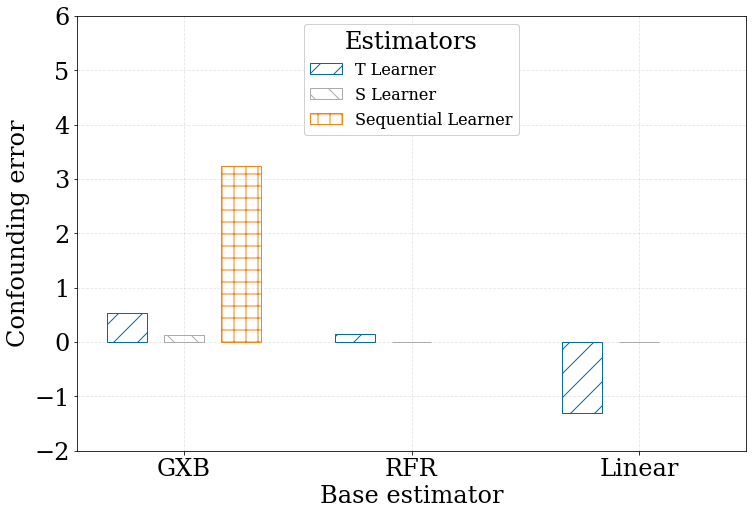

In [126]:
def plot_one_bar_c(titles, lists, y_label, xlabel, xlabels, est, ylim=[0, 20], opacity= [0.1, 0.1, 1], opacity1= [0.1, 0.1, 1]):
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    np.random.seed(0)
    plt.rcParams["figure.figsize"] =(12, 8)
    plt.rc('font', size=24, family='serif')
    plt.style.use('tableau-colorblind10')
    #import matplotlib.patches as mpatches

    w = 0.35    # bar width
    
    fig, ax = plt.subplots()
    ax.set_ylim(ylim)
    patterns = [ "/",  "\\", "+", ".", "+" , "\\",  "x", "o", "O", ".", "|" , "+" , "*" ]
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors =[colors[0], colors[2], colors[1]] + colors[3:]
    #colors2 = colors[4:]
    plt.ylabel(y_label)
    
    for idx, alist in enumerate(lists):
        err1, std1 = alist[0]
        err2, std2 = alist[1]
        #ll = [list(li) for li in alist] # x-coordinates of your bars
        y1=np.array(err1)
        y2=np.array(err2)
        yerr1_= np.array(std1)
        yerr2_= np.array(std2)
        y = y2-y1
        yerr=yerr2_ - yerr1_
        
        x1 = np.linspace(2*idx, 2*idx+1, num=len(y1))
        x2 = x1+2
        
        #print(len(x))
        bars = ax.bar(x1,
               height=[np.mean(yi) for yi in y],
               #yerr=[np.std(yi) for yi in y],    # error bars
               capsize=10, # error bar cap width in points
               width=w,    # bar width
               #tick_label=[ti for ti in titles],
               color=(0,0,0,0),  # face color transparent
               edgecolor=colors,
               #hatch=patterns[idx],
               #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
               label=titles[idx]
               )
        
        for i in range(len(bars)):
            bars[i].set(hatch = patterns[i], fill=False)
            if(idx==0):
                bars[i].set(alpha = 1)
            else:
                bars[i].set(alpha = opacity[i])
            
            #print(len(x))
        
            
        
        """for i in range(len(x1)):
            c = list(range(len(y1[i])))
            # distribute scatter randomly across whole width of bar
            x1i = x1[i] + np.random.random(len(y1[i])) * w - w / 2
            scatter = ax.scatter(x1i, 
                                 y1[i], 
                                 c=c, 
                                 alpha = opacity[0], 
                                 cmap="coolwarm")
            
            errbar = ax.errorbar(x1i, 
                        y1[i], 
                        yerr=yerr[i],
                        zorder=0, 
                        fmt="none",
                        marker="none",
                        ecolor='lightgray',
                        alpha = opacity[i],
                        elinewidth=2
                       );
            
            
        scatter.set(alpha = opacity[2])
            
    legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper right", title="Treatments", fontsize=16)"""
    
    
    ax.set_xticks([0.5, 2.5, 4.5])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(xlabels)):
        labels[i] = str(xlabels[i])
    ax.set_xticklabels(labels)
    
    # grid lines
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    
    plt.grid(True)
    #ax.add_artist(legend1)
    
    custom_lines =  [Patch(facecolor='w', edgecolor=colors[i], hatch = patterns[i]) for i in range(len(lists))]
    legend0 = ax.legend(custom_lines, titles, loc="upper center", title="Estimators", fontsize=16)
    ax.add_artist(legend0)
    
    """custom_lines2 =  [Patch(facecolor='w', edgecolor=colors[0], hatch = patterns[0]), Patch(facecolor='w', edgecolor=colors[0], hatch = patterns[0], alpha=0.4)]
    legend3 = ax.legend(custom_lines2, ['Unconfounded', 'Confounded'], loc="upper left", title="Confounding", fontsize=16)
    ax.add_artist(legend3)"""
    
    xlbel = xlabel.replace("_DX_", "")
    xlbel = xlbel.replace("_Hernandez_", "")
    plt.xlabel(xlbel)
    import re
    xlabel = re.sub('\W+','', xlabel )
    plt.savefig('plots/experiment_'+str(xlabel)+'_'+str(est)+'.pdf', format='pdf', dpi=500)
    plt.show()
    
    
plot_one_bar_c(['T Learner', 'S Learner', 'Sequential Learner'] , 
                 [[err_gxb_u, err_gxb_c], 
                  [err_rfr_u, err_rfr_c], 
                  [err_lr_u, err_lr_c]
                 ], 
                 'Confounding error', 
               'Base estimator', 
               ['GXB', 'RFR', 'Linear'], 
               'all', 
               [-2, 6], 
               [1,1,0], [1,1,0])

# N

In [ ]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'N_1000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'N_10000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'N_50000.pickle',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1000, 10000, 50000], 'lr',
                     [0, 30] #10000000
                    )

In [ ]:
plotting_pickle_prefix = 'data/hist_asym_noise_estimators_'
plot_the_damn_things(plotting_pickle_prefix+'reg_N_1000.pickle',
                     plotting_pickle_prefix+'reg_N_10000.pickle',
                     plotting_pickle_prefix+'N_50000.pickle',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1000, 10000, 50000], 'lr_once',
                     [0, 30] #10000000
                    )

In [ ]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'N_1000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'N_10000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'N_50000.pickle',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1000, 10000, 50000], 'gxb',
                     [0, 45] #10000000
                    )

In [ ]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'N_1000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'N_10000.pickle',
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'N_50000.pickle',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Sample size, $N$', # ($\epsilon$=0.1, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1000, 10000, 50000], 'rfr',
                     [0, 30] #10000000
                    )

# $\epsilon$

### Linear Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

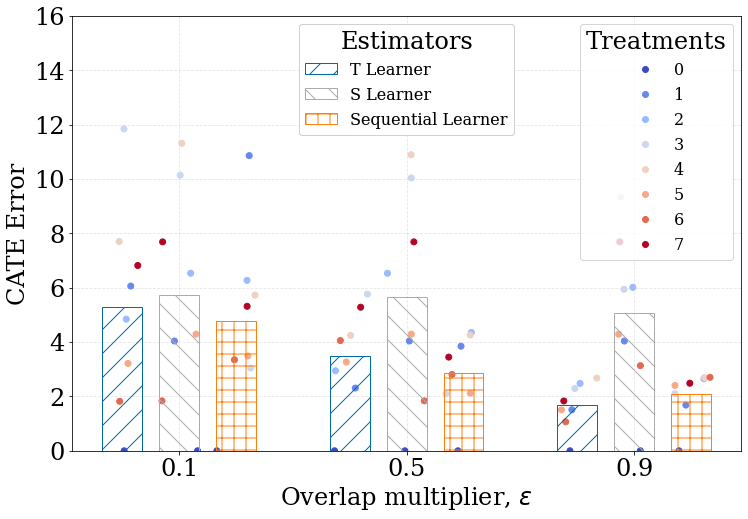

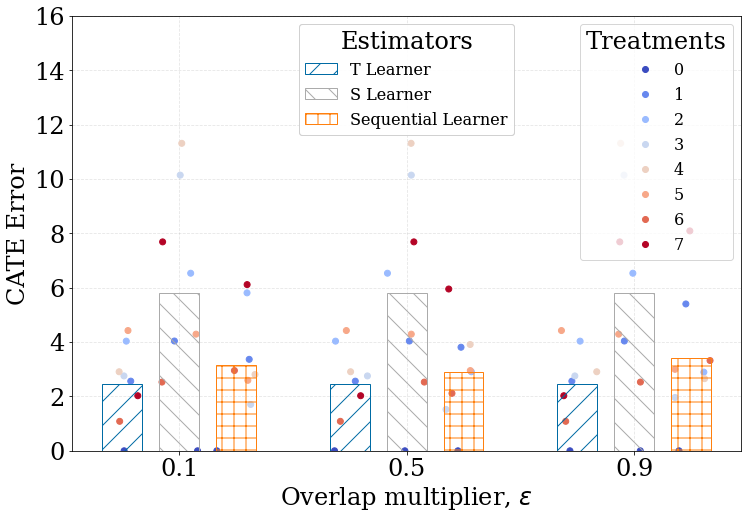

In [724]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'lr',
                     [0, 16]
                    )

### Gradient Boosting Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

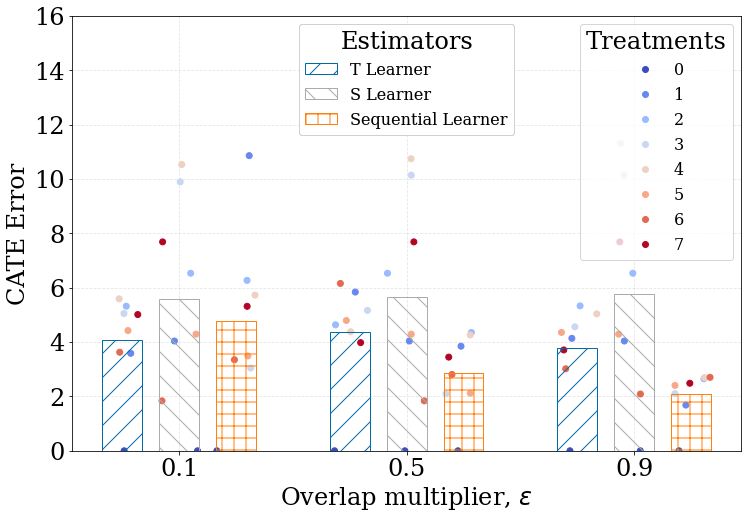

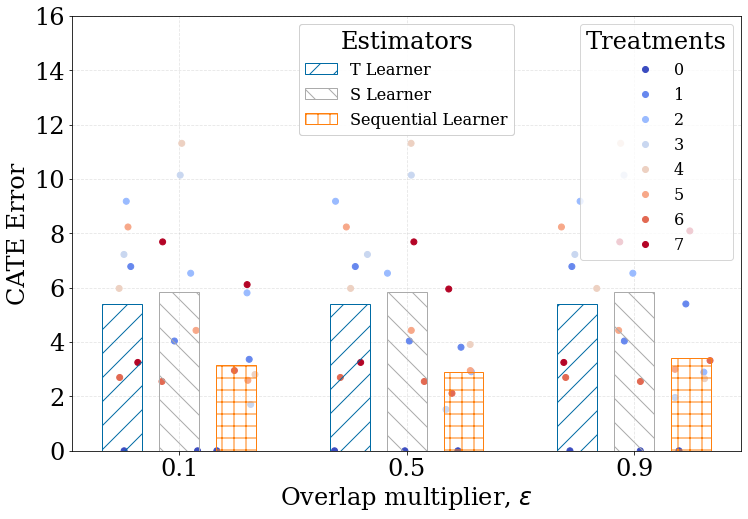

In [722]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', # ($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'gxb',
                     [0,16]
                    )

### Random Forest Estimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

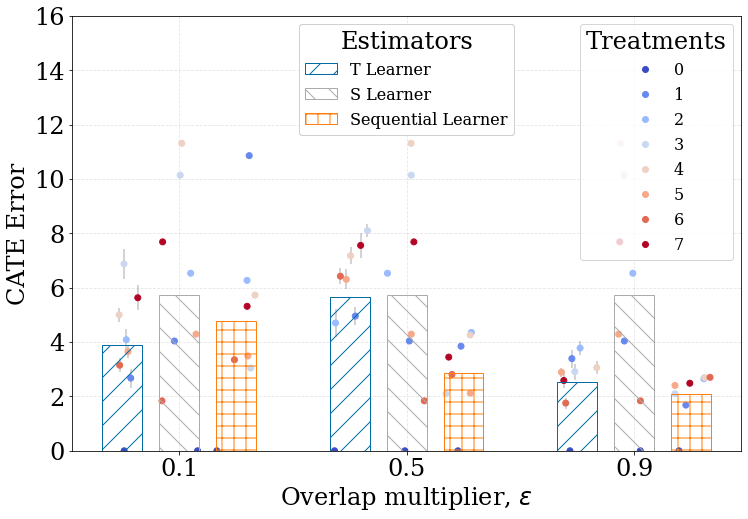

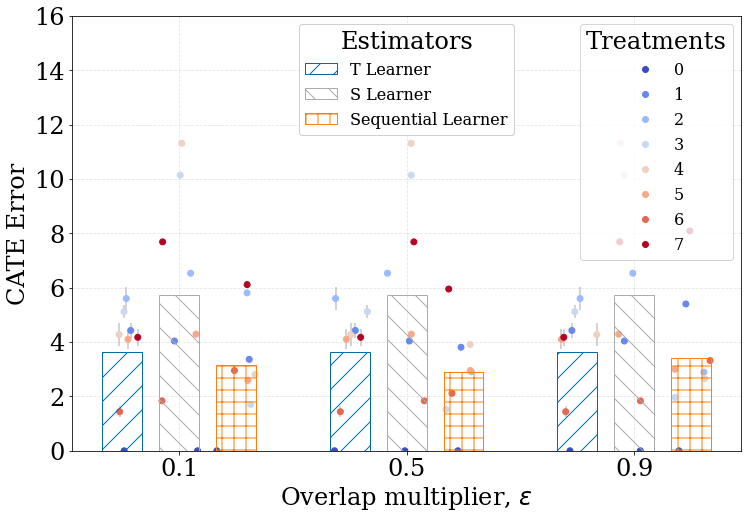

In [721]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.1.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.5.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', # ($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', # ($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'rfr',
                     [0,16]
                    )

### Confounded

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

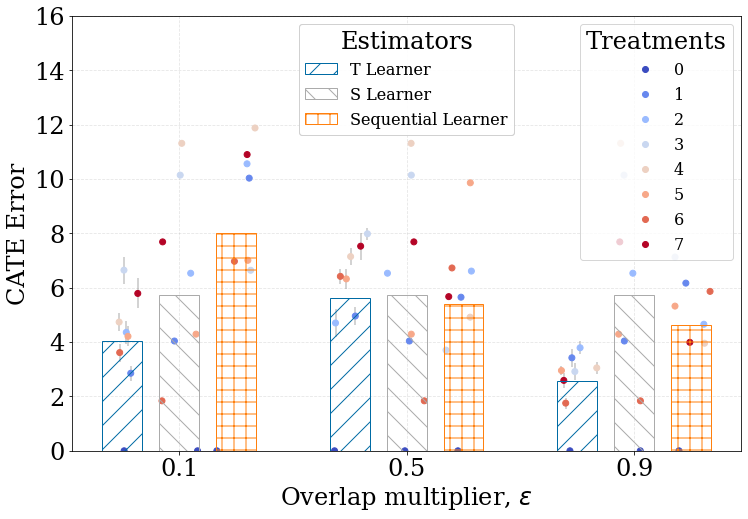

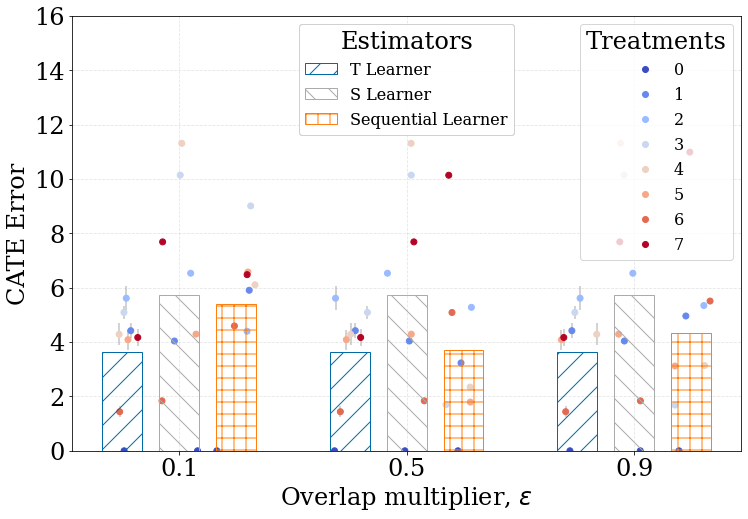

In [720]:
plot_the_damn_things('data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.1.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.5.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'epsilon_0.9.pickle',
                     r'Overlap multiplier, $\epsilon$', #($\gamma$=2, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Overlap multiplier, $\epsilon$', # ($\gamma$=2, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [0.1, 0.5, 0.9], 'confounded_rfr',
                     [0,16]
                    )

# $\gamma$

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

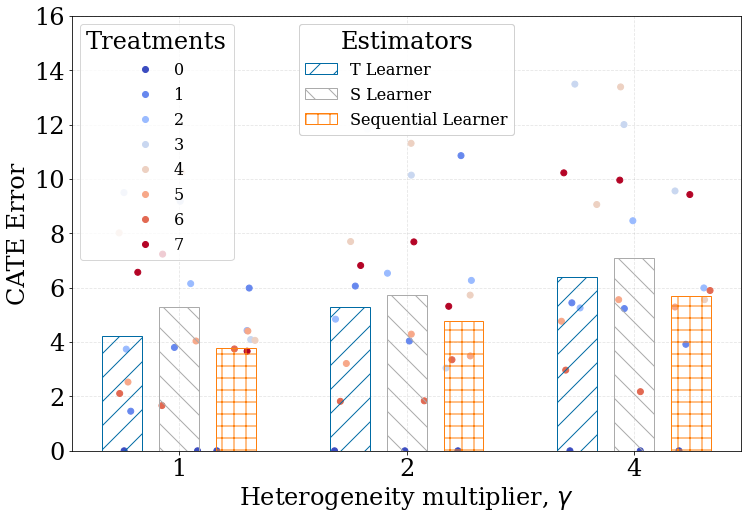

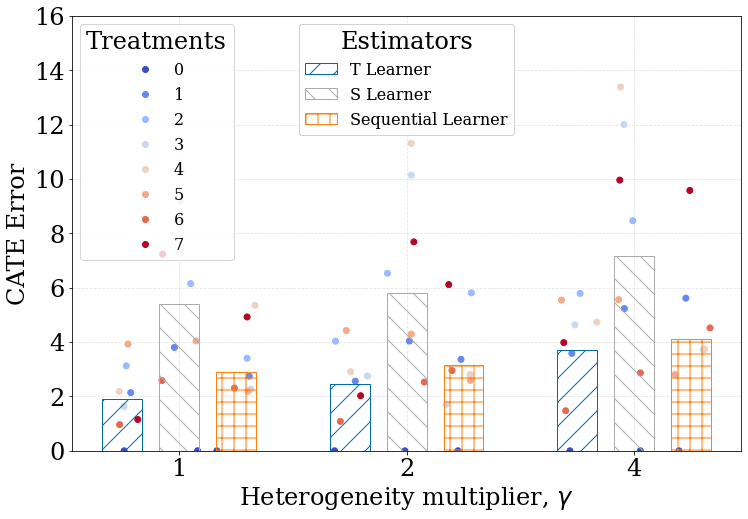

In [713]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'gamma_1.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'gamma_2.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'lr' + '_'+'gamma_4.0.pickle',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1, 2, 4], 'lr',
                     [0, 16]
                    )

### Gradient Boosting Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

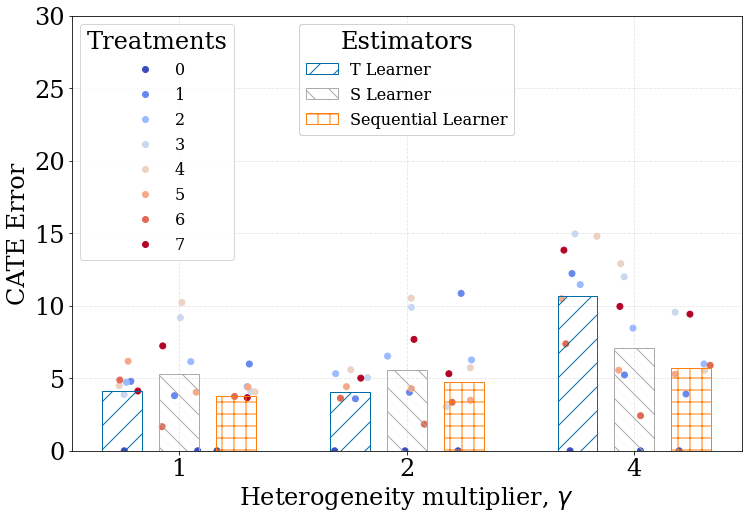

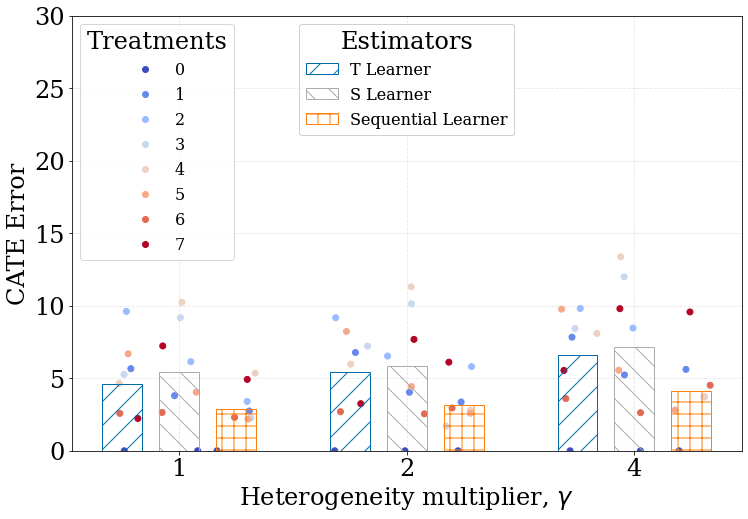

In [712]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'gamma_1.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'gamma_2.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'gxb' + '_'+'gamma_4.0.pickle',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1, 2, 4], 'gxb', 
                     [0,30]
                    )

### Random Forest Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

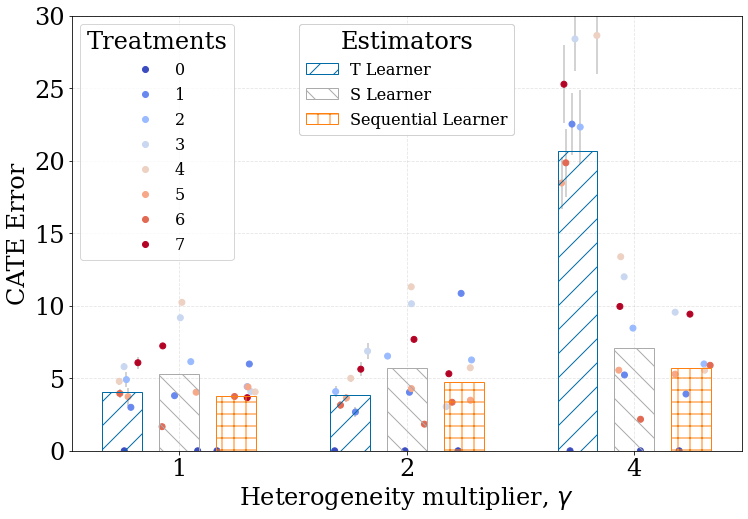

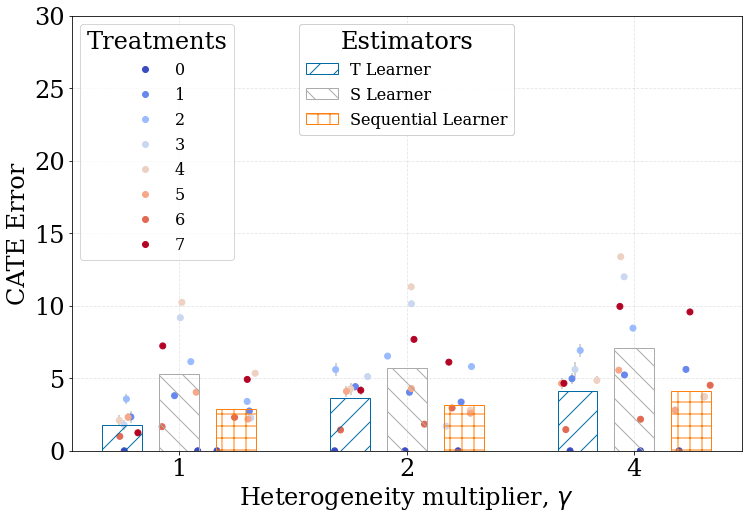

In [710]:
plot_the_damn_things('data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_1.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_2.0.pickle', 
                     'data/unconfounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_4.0.pickle',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'Heterogeneity multiplier, $\gamma$',# ($\epsilon$=0.1, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1, 2, 4], 
                     'rfr',
                     [0,30]
                    )

### Confounded

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

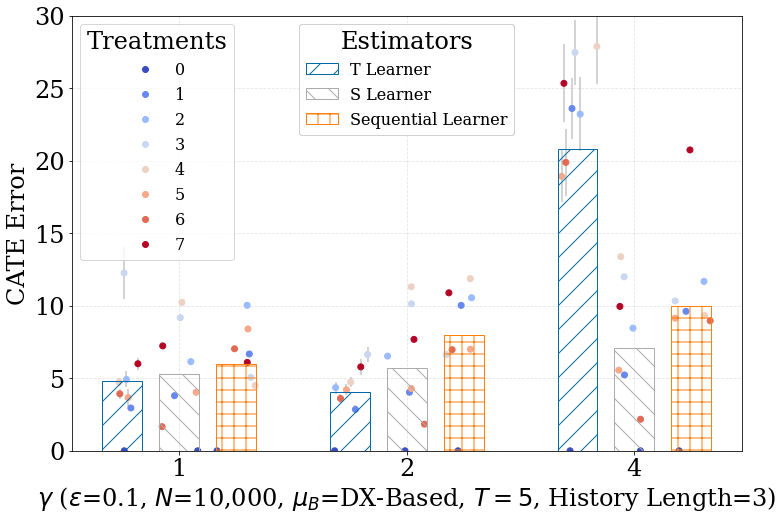

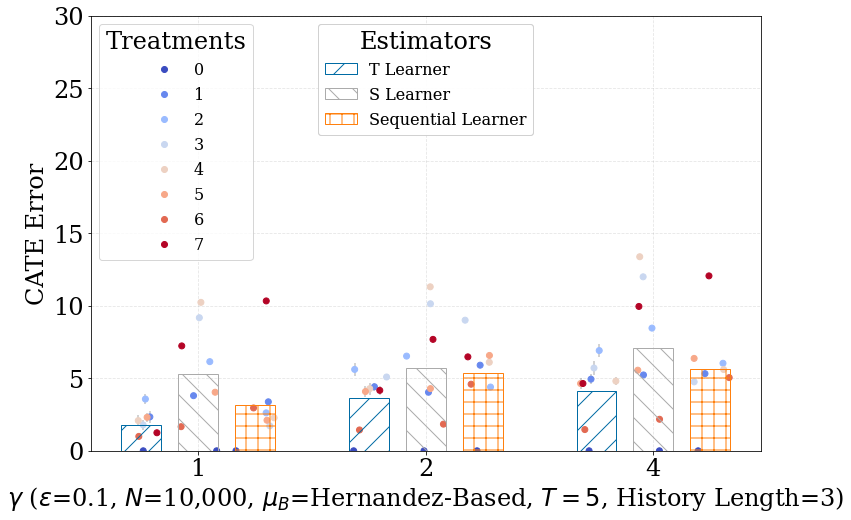

In [674]:
plot_the_damn_things('data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_1.0.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_2.0.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_' + 'gamma_4.0.pickle',
                     r'$\gamma$ ($\epsilon$=0.1, $N$=10,000, $\mu_B$=DX-Based, $T=5$, History Length=3)',
                     r'$\gamma$ ($\epsilon$=0.1, $N$=10,000, $\mu_B$=Hernandez-Based, $T=5$, History Length=3)',
                     [1, 2, 4], 
                     [0,30]
                    )

# $H$

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

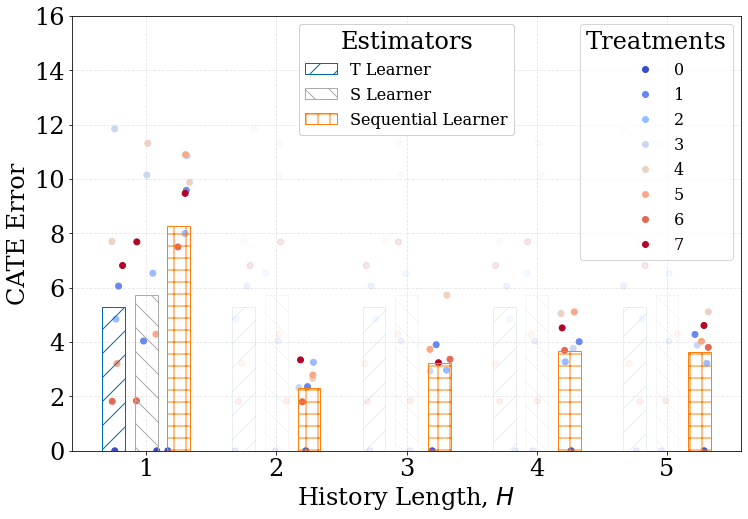

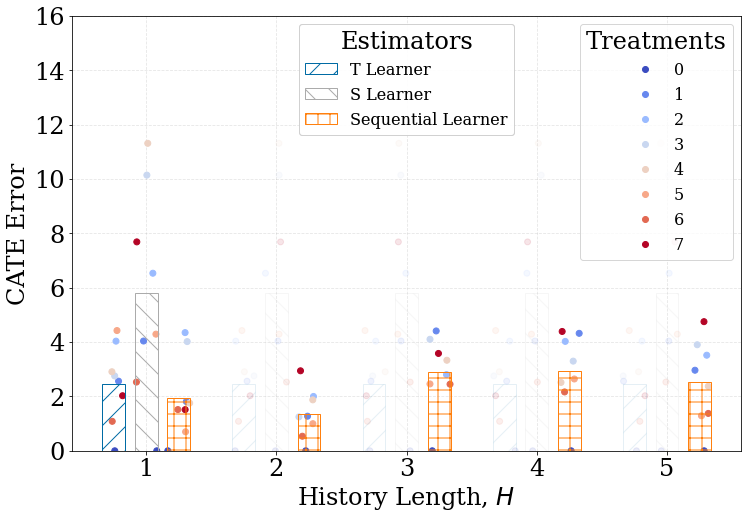

In [708]:
plot_the_damn_things_history('data/hist_asym_noise_estimator_' + 'lr' + '_'+'history_1.pickle', 
                     'data/hist_asym_noise_estimator_' + 'lr' + '_'+'history_2.pickle', 
                     'data/hist_asym_noise_estimator_' + 'lr' + '_'+'history_3.pickle',
                     'data/hist_asym_noise_estimator_' + 'lr' + '_'+'history_4.pickle',
                     'data/hist_asym_noise_estimator_' + 'lr' + '_'+'history_5.pickle',
                     r'History Length, $H$',# ($\epsilon$=0.1, $N=10,000$, $\gamma$=2, $\mu_B$=DX-Based, $T=5$)',
                     r'History Length, $H$',# ($\epsilon$=0.1, $N=10,000$, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$)',
                     [1, 2, 3, 4, 5], 
                             'lr',
                     [0,16],
                     [0.1, 0.1, 1]
                    )

### Gradient Boosting Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

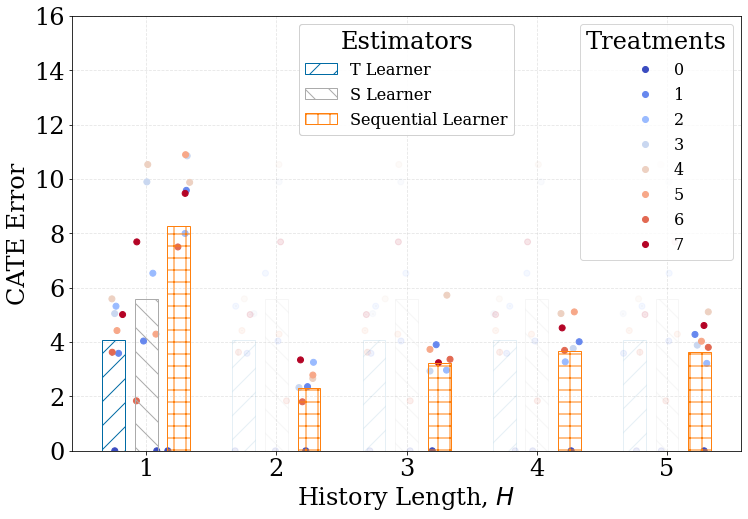

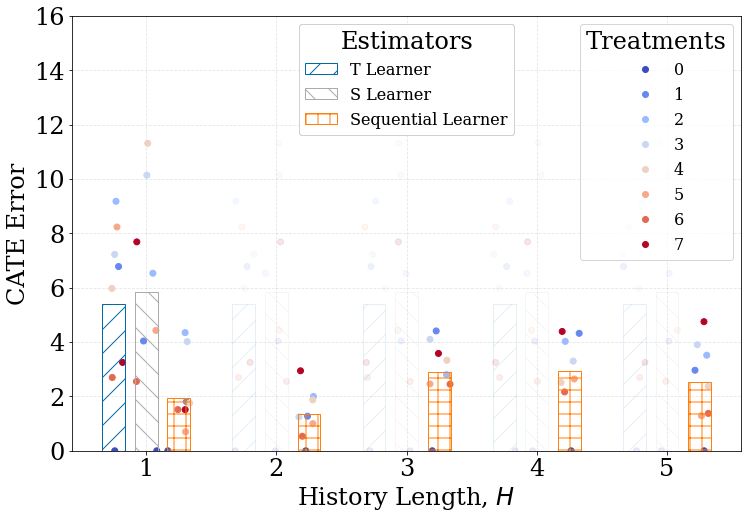

In [706]:
plot_the_damn_things_history('data/hist_asym_noise_estimator_' + 'gxb' + '_'+'history_1.pickle', 
                     'data/hist_asym_noise_estimator_' + 'gxb' + '_'+'history_2.pickle', 
                     'data/hist_asym_noise_estimator_' + 'gxb' + '_'+'history_3.pickle',
                     'data/hist_asym_noise_estimator_' + 'gxb' + '_'+'history_4.pickle',
                     'data/hist_asym_noise_estimator_' + 'gxb' + '_'+'history_5.pickle',
                     r'History Length, $H$', # ($\epsilon$=0.1, $N=10,000$, $\gamma$=2, $\mu_B$=DX-Based, $T=5$)',
                     r'History Length, $H$', # ($\epsilon$=1.0, $N=10,000$, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$)',
                     [1, 2, 3, 4, 5], 
                             'gxb',
                     [0,16],
                     
                     [0.1, 0.1, 1]
                    )

### Random Forest Esimator

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

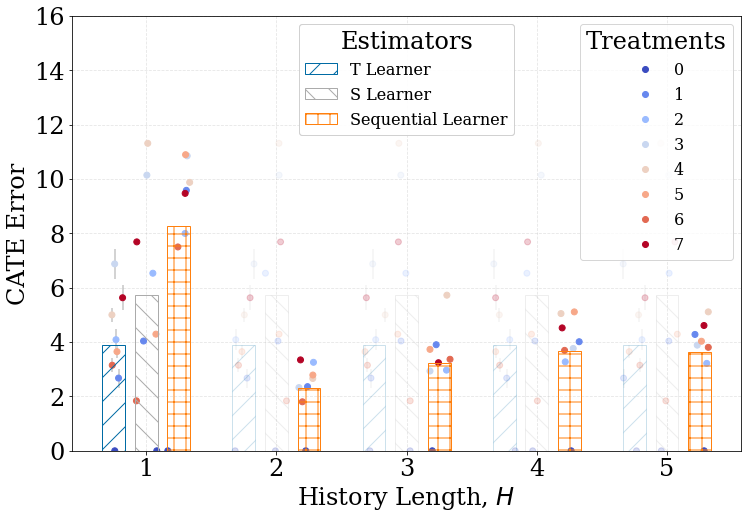

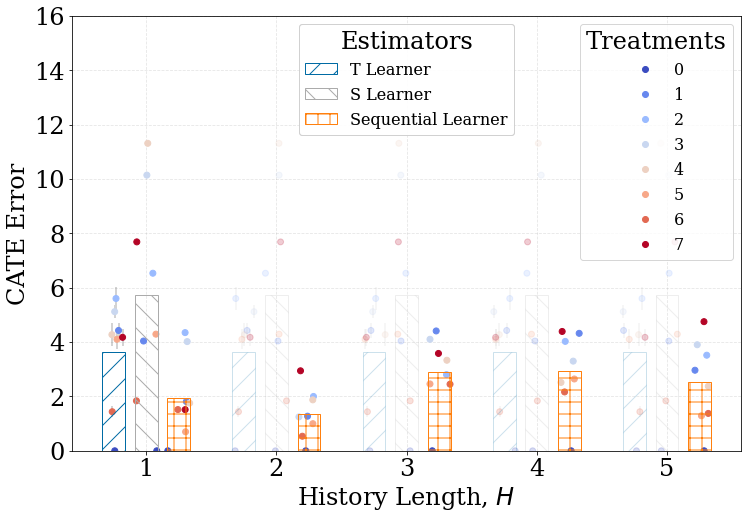

In [702]:
plot_the_damn_things_history('data/hist_asym_noise_estimator_' + 'rfr' + '_'+'history_1.pickle', 
                     'data/hist_asym_noise_estimator_' + 'rfr' + '_'+'history_2.pickle', 
                     'data/hist_asym_noise_estimator_' + 'rfr' + '_'+'history_3.pickle',
                     'data/hist_asym_noise_estimator_' + 'rfr' + '_'+'history_4.pickle',
                     'data/hist_asym_noise_estimator_' + 'rfr' + '_'+'history_5.pickle',
                     r'History Length, $H$', # ($\epsilon$=0.1, $N=10,000$, $\gamma$=2, $\mu_B$=DX-Based, $T=5$)',
                     r'History Length, $H$', #'($\epsilon$=1.0, $N=10,000$, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$)',
                     [1, 2, 3, 4, 5], 
                     'rfr',
                     [0,16], 
                     [0.2, 0.2, 1]
                    )

### Confounded

/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/apps/Alvis/software/SciPy-bundle/2020.11-fosscuda-2020b/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double

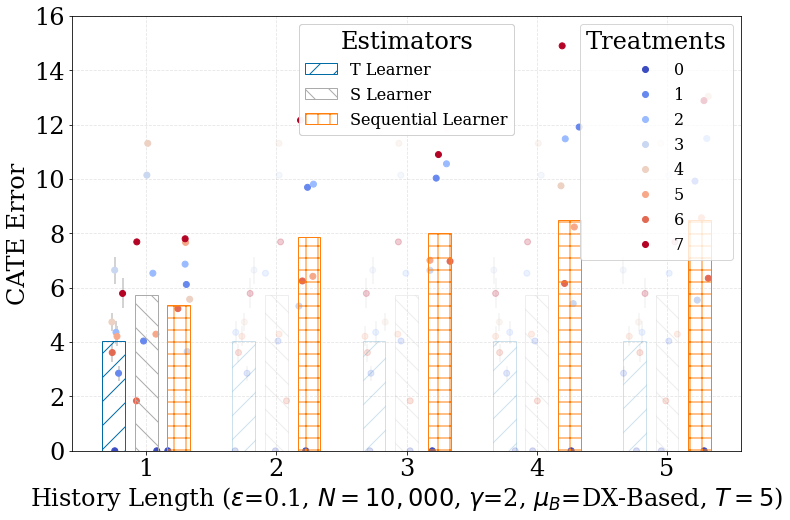

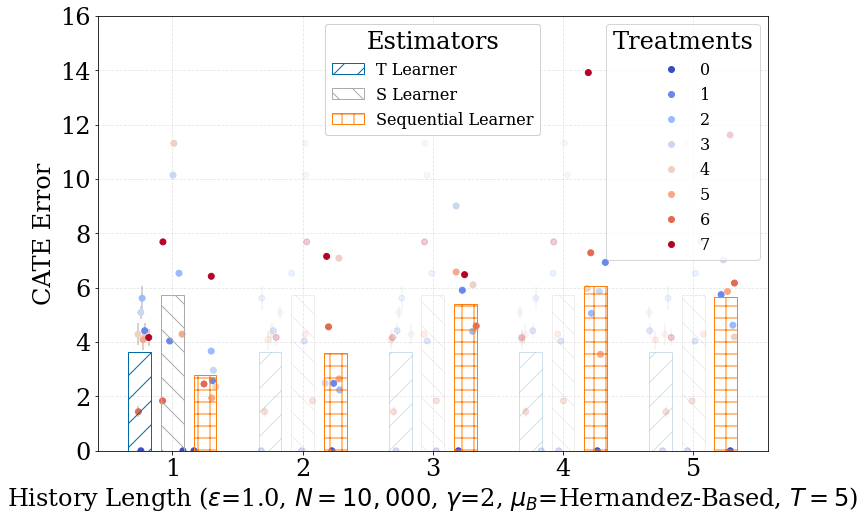

In [681]:
plot_the_damn_things_history('data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'history_1.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'history_2.pickle', 
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'history_3.pickle',
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'history_4.pickle',
                     'data/confounded_hist_asym_noise_estimator_' + 'rfr' + '_'+'history_5.pickle',
                     r'History Length ($\epsilon$=0.1, $N=10,000$, $\gamma$=2, $\mu_B$=DX-Based, $T=5$)',
                     r'History Length ($\epsilon$=1.0, $N=10,000$, $\gamma$=2, $\mu_B$=Hernandez-Based, $T=5$)',
                     [1, 2, 3, 4, 5], 
                     [0,16], 
                     [0.2, 0.2, 1]
                    )

# Data Statistics

In [ ]:
DGPcols = ['RID','AGE','VISCODE','PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY','APOE4', 'FDG','AV45', 'ABETA', 'ABETA40','ABETA42','TAU', 'PTAU', 'DX', 'MMSE', 'ADAS13', 'CDRSB']

data_loader = dl.DataLoader()
D_adni = data_loader.loadData("data/ADNIMERGE.csv", DGPcols)

In [ ]:
plt.rc('font', size=16, family='serif')

plt.hist([dfDX[dfDX['VISCODE']==24]['ADAS13'], D_adni['ADAS13']], density=True, bins=32)
plt.xlabel('ADAS13')
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX[dfDX['VISCODE']==24]['Y_hat'], D_adni['ADAS13']], density=True, bins=32)
#plt.xlabel('Y_hat')
plt.legend(['Generated $Y$', 'Original ADAS13'])
plt.grid()
plt.show()

plt.hist([dfDX[dfDX['VISCODE']==0]['DX'], D_adni['DX']], density=True, bins=3)
plt.xlabel('Diagnosis')
plt.xticks(list(config.DX_Codes.values()), list(config.DX_Codes.keys()))
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['PTMARRY'], D_adni['PTMARRY']], density=True, bins=D_adni['PTMARRY'].nunique())
plt.xlabel('Marital status')
plt.xticks(list(config.PTMARRY_Codes.values()), list(config.PTMARRY_Codes.keys()))
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['PTEDUCAT'], D_adni['PTEDUCAT']], density=True, bins=D_adni['PTEDUCAT'].nunique())
plt.legend(['Generated', 'Original'])
plt.xlabel('Education')
plt.grid()
plt.show()

plt.scatter(dfDX['PTEDUCAT']+0.1*np.random.randn(dfDX['PTRACCAT'].shape[0]), dfDX['PTRACCAT']+0.1*np.random.randn(dfDX['PTRACCAT'].shape[0]), s=1)
plt.scatter(D_adni['PTEDUCAT']+0.1*np.random.randn(D_adni['PTRACCAT'].shape[0]), D_adni['PTRACCAT']+0.1*np.random.randn(D_adni['PTRACCAT'].shape[0]), s=1)
plt.xlabel('Education')
plt.ylabel('Race')
plt.yticks(list(config.PTRACCAT_Codes.values()), list(config.PTRACCAT_Codes.keys()))
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.scatter(dfDX['PTEDUCAT']+0.1*np.random.randn(dfDX['PTMARRY'].shape[0]), dfDX['PTMARRY']+0.1*np.random.randn(dfDX['PTMARRY'].shape[0]), s=1)
plt.scatter(D_adni['PTEDUCAT']+0.1*np.random.randn(D_adni['PTMARRY'].shape[0]), D_adni['PTMARRY']+0.1*np.random.randn(D_adni['PTRACCAT'].shape[0]), s=1)
plt.xlabel('Education')
plt.ylabel('Marital status')
plt.yticks(list(config.PTMARRY_Codes.values()), list(config.PTMARRY_Codes.keys()))
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['AV45'], D_adni['AV45']], density=True)
plt.xlabel('AV45')
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['TAU'], D_adni['TAU']], density=True)
plt.xlabel('PTAU')
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['PTAU'], D_adni['PTAU']], density=True)
plt.xlabel('PTAU')
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()

plt.hist([dfDX['FDG'], D_adni['FDG']], density=True)
plt.xlabel('FDG')
plt.legend(['Generated', 'Original'])
plt.grid()
plt.show()


plt.hist([dfDX['APOE4'], D_adni['APOE4']], density=True)
plt.xlabel('APOE4')
plt.legend(['Generated', 'Original'])
plt.xticks([0, 1, 2])
plt.grid()
plt.show()

plt.scatter(dfDX['APOE4']+0.1*np.random.randn(dfDX['APOE4'].shape[0]), dfDX['Z']+0.1*np.random.randn(dfDX['Z'].shape[0]), s=1)
plt.xlabel('APOE4')
plt.ylabel('Z')
plt.yticks([0, 1])
plt.xticks([0, 1, 2])
plt.grid()
plt.show()

plt.scatter(dfDX['Z']+0.05*np.random.randn(dfDX['Z'].shape[0]), dfDX['FDG'], s=1)
plt.xlabel('Z')
plt.ylabel('FDG')
plt.xticks([0, 1])
plt.grid()
plt.show()

plt.scatter(dfDX['Z']+0.05*np.random.randn(dfDX['Z'].shape[0]), dfDX['ADAS13'], s=1)
plt.xlabel('Z')
plt.ylabel('ADAS13')
plt.xticks([0, 1])
plt.grid()
plt.show()

In [ ]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [ ]:
#D_adni['ABETARatio'] = np.exp(-np.log(D_adni['ABETARatio']))
D_adni.corr()

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(D_adni.corr())

In [ ]:
D_adni.describe()

In [ ]:
plt.hist(D_adni['ABETARatio'])

In [ ]:

from sklearn.mixture import GaussianMixture as GMM


AB_ratio = np.array(D_adni['ABETARatio']).reshape(-1, 1)
gmm = GMM(n_components=2, random_state=0).fit(AB_ratio)
labels = gmm.predict(AB_ratio)

In [ ]:
gmmAGE = GMM(n_components=1, random_state=0, covariance_type='full').fit(np.array(D_adni['AGE']).reshape(-1, 1) )
print(gmmAGE.means_)
print(np.sqrt(gmmAGE.covariances_))

In [ ]:
 
from scipy.stats import skewnorm, lognorm

n = 1000

def sample_asymetric_AGE(N):
    a, loc, scale = -0.6783052361536166, 76.18409213099177, 7.897017603971423
    rv = skewnorm(a)
    val = ((rv.rvs(size=N)*scale) + loc) #- mean
    return val

def sample_asymetric(covariate_vals, n, log=False):
    #a is the skewness parameter
    loc, scale = 0, 0
    if(log):
        s, loc, scale = lognorm.fit(covariate_vals)
        rv = lognorm(s)
    else:
        a, loc, scale = skewnorm.fit(covariate_vals)
        rv = skewnorm(a)
    
    #mean= (rv.mean()*scale) + loc
    val = ((rv.rvs(size=n)*scale) + loc) #- mean
    
    return val

def sample_noise(D_adni_bl, covariate, n):
    #a is the skewness parameter
    a, loc, scale = skewnorm.fit(D_adni_bl[covariate][pd.notna(D_adni_bl[covariate])].values)
    #a, loc, scale = lognorm.fit(D_adni_bl[covariate][pd.notna(D_adni_bl[covariate])].values)
    print(a, loc, scale)
    
    rv = skewnorm(a)
    mean= (rv.mean()*scale) + loc

    noise = ((rv.rvs(size=n)*scale) + loc) - mean
    
    return noise


cols = ['TAU', 'PTAU', 'FDG', 'AV45', 'MMSE', 'ADAS13', 'CDRSB']
noises = {}
noises_n={}

#residuals =None    
#load gresiduals for sampling noises
#with open(config.residuals_file, 'rb') as f:
#    residuals = pickle.load(f)
        
for col in cols:
    noises_n[col] = sample_noise(D_adni, col, n)
    noises[col] = sample_asymetric(residuals[col].values, n) #sample_asymetric_AGE(n)
    plt.figure()
    plt.hist([noises_n[col], noises[col], D_adni[col]], density=True, bins=32)
    plt.xlabel(col)
    plt.legend(['noise from shifted population', 'noise with residuals', 'Original Data'])
    plt.grid()
    plt.show()

In [ ]:
dfAD = pd.read_csv('data/asym_noise_estimators_gen_df_DX_Based_N_10000_rnd_seed_0_epsilon_0.1_gamma0_2.0_gamma1_2.0.csv')
dfAS = pd.read_csv('data/asym_noise_estimators_gen_df_Santiago_Based_N_10000_rnd_seed_0_epsilon_0.1_gamma0_2.0_gamma1_2.0.csv')

In [ ]:
cols = ['TAU', 'PTAU', 'FDG', 'AV45', 'MMSE', 'ADAS13', 'CDRSB', 'DX', 'AGE']
month=24
for col in cols:
    plt.figure()
    #plt.hist([dfAD[col], D_adni[col]], density=True, bins=32)
    plt.hist([dfAS[dfAS['VISCODE']==month][col], D_adni[D_adni['VISCODE']==month][col]], density=True, bins=32)
    plt.xlabel(col)
    plt.legend(['Generated Data Santiago', 'Original Data'])
    plt.grid()
    plt.show()


In [ ]:
for col in cols:
    plt.figure()
    plt.hist([dfAS[col], D_adni[col], dfSantiago[col]], density=True, bins=32)
    plt.xlabel(col)
    plt.legend(['Generated Data Santiago', 'Original Data', 'Previous Data Santiago'])
    plt.grid()

In [ ]:
for col in cols:
    plt.figure()
    plt.hist([dfAD[col], D_adni[col], dfDX[col]], density=True, bins=32)
    plt.xlabel(col)
    plt.legend(['Generated Data DX', 'Original Data', 'Previous Data DX'])
    plt.grid()

In [ ]:
import treatments as tr
import data_models as dm
import config

residuals = {}

imputed_df = pd.read_csv('data/imputed_ADNI.csv')
AB_ratio_bl_df =  imputed_df[imputed_df['VISCODE']==0]

lrTAU, TAURMSE,residuals['TAU'], resTAU= dm.fit_X1_model(AB_ratio_bl_df, 'TAU', 'REGRESSION', test_size=0.2, return_metrics=True)
lrPTAU, PTAURMSE, residuals['PTAU'], resPTAU = dm.fit_X1_model(AB_ratio_bl_df,  'PTAU', 'REGRESSION', test_size=0.2, return_metrics=True)
lrFDG, FDGRMSE, residuals['FDG'], resFDG = dm.fit_X1_model(AB_ratio_bl_df,  'FDG', 'REGRESSION', test_size=0.2, return_metrics=True)
lrAV45, AV45RMSE, residuals['AV45'], resAV45 = dm.fit_X1_model(AB_ratio_bl_df, 'AV45', 'REGRESSION', test_size=0.2, return_metrics=True)
lrADAS13, ADAS13RMSE, residuals['ADAS13'], resADAS13 = dm.fit_X1_model(AB_ratio_bl_df, 'ADAS13', 'REGRESSION', test_size=0.2, return_metrics=True)
lrMMSE, MMSERMSE, residuals['MMSE'], resMMSE = dm.fit_X1_model(AB_ratio_bl_df,'MMSE', 'REGRESSION', test_size=0.2, return_metrics=True)
lrCDRSB, CDRSBRMSE, residuals['CDRSB'], resCDRSB = dm.fit_X1_model(AB_ratio_bl_df,'CDRSB', 'REGRESSION', test_size=0.2, return_metrics=True)

### Model fit

In [626]:
resClassifiers_bl = pd.read_csv('data/resClassifiers_bl.csv')
resClassifiers_bl.head(100)


,target,acc_tr,acc_te,acc_std_tr,acc_std_te,bacc_tr,bacc_te,f1_tr,f1_te,n_classes,n_train,n_test
0,APOE4,0.482759,0.454023,0.500062,0.499319,0.347099,0.326465,0.462436,0.425321,3,696,174
1,PTEDUCAT,0.242816,0.212644,0.429093,0.410359,0.089197,0.100271,0.132144,0.085474,13,696,174
2,PTMARRY,0.758621,0.735632,0.428228,0.442269,0.200000,0.200000,0.654496,0.623582,5,696,174
3,DX,0.673851,0.632184,0.469140,0.483603,0.657375,0.616409,0.668933,0.626843,3,696,174


In [627]:
resRegressors_bl = pd.read_csv('data/resRegressors_bl.csv')
resRegressors_bl.head(100)

,target,rmse_tr,rmse_te,r2_tr,r2_te,y_std,res_std_tr,res_std_te,n_train,n_test
0,TAU,102.729060,105.347525,-0.928161,-1.128133,133.427673,102.802881,105.641845,696,174
1,PTAU,10.588344,11.000953,-0.425123,-0.551336,14.509194,10.595950,11.027560,696,174
2,FDG,0.128392,0.137125,-3.246267,-3.789037,0.150649,0.128484,0.136091,696,174
3,AV45,0.143584,0.145907,0.228492,0.202992,0.231130,0.143688,0.146107,696,174
4,ADAS13,4.924433,6.361579,0.528606,0.209770,9.572328,4.927971,6.367023,696,174
5,CDRSB,1.152929,1.261604,0.044773,-0.059853,1.536967,1.153758,1.248291,696,174
6,MMSE,1.716493,2.032413,-0.172869,-0.557049,2.650606,1.717728,2.037784,696,174


In [628]:
resClassifiers_auto_DX_Based = pd.read_csv('data/resClassifiers_auto_DX_Based.csv')
resClassifiers_auto_DX_Based.head(100)

,target,acc_tr,acc_te,acc_std_tr,acc_std_te,bacc_tr,bacc_te,f1_tr,f1_te,n_classes,n_train,n_test
0,APOE4,0.980198,0.961538,0.140014,0.196116,0.904762,0.666667,0.978778,0.942890,3,101,26
1,PTEDUCAT,0.990099,1.000000,0.099504,0.000000,0.900000,1.000000,0.985299,1.000000,10,101,26
2,PTMARRY,0.940594,0.961538,0.237562,0.196116,0.479167,0.666667,0.916651,0.942801,4,101,26
3,DX,0.950495,0.884615,0.218002,0.325813,0.945739,0.730159,0.950763,0.876923,3,101,26


In [629]:
resRegressors_auto_DX_Based = pd.read_csv('data/resRegressors_auto_DX_Based.csv')
resRegressors_auto_DX_Based.head(100)

,target,rmse_tr,rmse_te,r2_tr,r2_te,y_std,res_std_tr,res_std_te,n_train,n_test
0,TAU,31.551155,47.813206,0.896896,0.734329,117.954513,31.690716,48.261665,101,26
1,PTAU,3.028312,3.696962,0.924097,0.908824,13.639578,3.042803,3.675169,101,26
2,FDG,0.041009,0.058600,0.784915,0.089523,0.086838,0.041214,0.057796,101,26
3,AV45,0.052062,0.121971,-2.824656,-82.032603,0.122162,0.052298,0.121190,101,26
4,ADAS13,2.680230,4.093005,0.923054,0.555479,6.280738,2.692134,4.144076,101,26
5,MMSE,1.194975,1.629810,0.847502,-0.261550,2.243623,1.200935,1.650018,101,26
6,CDRSB,0.541213,1.193780,0.957266,-0.610191,1.403978,0.543912,1.182853,101,26


In [78]:
resClassifiers_bl = pd.read_csv('data/resClassifiers_bl.csv')
resClassifiers_bl.head(100)

,target,acc_tr,acc_te,acc_std_tr,acc_std_te,bacc_tr,bacc_te,f1_tr,f1_te,n_classes,n_train,n_test
0,APOE4,0.482759,0.454023,0.500062,0.499319,0.347099,0.326465,0.462436,0.425321,3,696,174
1,PTEDUCAT,0.242816,0.212644,0.429093,0.410359,0.089197,0.100271,0.132144,0.085474,13,696,174
2,PTMARRY,0.758621,0.735632,0.428228,0.442269,0.200000,0.200000,0.654496,0.623582,5,696,174
3,DX,0.676724,0.620690,0.468063,0.486616,0.657206,0.599573,0.672135,0.612284,3,696,174


In [79]:
resClassifiers_auto_DX_Based = pd.read_csv('data/resClassifiers_auto_DX_Based.csv')
resClassifiers_auto_DX_Based.head(100)

,target,acc_tr,acc_te,acc_std_tr,acc_std_te,bacc_tr,bacc_te,f1_tr,f1_te,n_classes,n_train,n_test
0,APOE4,0.980198,0.961538,0.140014,0.196116,0.904762,0.666667,0.978778,0.942890,3,101,26
1,PTEDUCAT,0.990099,1.000000,0.099504,0.000000,0.900000,1.000000,0.985299,1.000000,10,101,26
2,PTMARRY,0.940594,0.961538,0.237562,0.196116,0.479167,0.666667,0.916651,0.942801,4,101,26
3,DX,0.950495,0.884615,0.218002,0.325813,0.945739,0.730159,0.950763,0.876923,3,101,26


In [81]:
resRegressors_bl = pd.read_csv('data/resRegressors_bl.csv')
resRegressors_bl.head(100)

,target,rmse_tr,rmse_te,r2_tr,r2_te,y_std,res_std_tr,res_std_te,n_train,n_test
0,TAU,102.729060,105.347525,-0.928161,-1.128133,133.427673,102.802881,105.641845,696,174
1,PTAU,10.588344,11.000953,-0.425123,-0.551336,14.509194,10.595950,11.027560,696,174
2,FDG,0.128392,0.137125,-3.246267,-3.789037,0.150649,0.128484,0.136091,696,174
3,AV45,0.143584,0.145907,0.228492,0.202992,0.231130,0.143688,0.146107,696,174
4,ADAS13,4.901017,6.436465,0.538745,0.190010,9.508414,4.904539,6.445176,696,174
5,CDRSB,0.981174,1.116969,0.486614,0.349512,1.563730,0.981879,1.104389,696,174
6,MMSE,1.455281,1.719819,0.403270,0.174890,2.616979,1.456328,1.724475,696,174


In [82]:
resRegressors_auto_DX_Based = pd.read_csv('data/resRegressors_auto_DX_Based.csv')
resRegressors_auto_DX_Based.head(100)

,target,rmse_tr,rmse_te,r2_tr,r2_te,y_std,res_std_tr,res_std_te,n_train,n_test
0,TAU,31.551155,47.813206,0.896896,0.734329,117.954513,31.690716,48.261665,101,26
1,PTAU,3.028312,3.696962,0.924097,0.908824,13.639578,3.042803,3.675169,101,26
2,FDG,0.041009,0.058600,0.784915,0.089523,0.086838,0.041214,0.057796,101,26
3,AV45,0.052062,0.121971,-2.824656,-82.032603,0.122162,0.052298,0.121190,101,26
4,ADAS13,2.682242,4.100460,0.922891,0.555315,6.280738,2.694194,4.150316,101,26
5,MMSE,1.042795,1.414116,0.893550,-0.010706,2.243623,1.047996,1.435622,101,26
6,CDRSB,0.465057,1.132407,0.968925,-0.747528,1.412581,0.467376,1.090324,101,26
